In [1]:
# ASV Differential Abundance in Response to Metaboliet Additions
#
# Author: Vanessa Brisson
# Copyright (C) 2023 Vanessa Brisson
#
# License: MIT

In [2]:
# LOAD NECESSARY PACKAGES

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.gridspec import GridSpec
import scipy.stats as stats
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.transforms as transforms

In [5]:
# LOAD 4-HYDROXYBENZOIC ACID DATA

# this is the differential abundance data generated in the ANCOMBC analysis 
# of the 4-hydroxybenzoic acid addition experiment

data_4hba = pd.read_csv('ProcessedSequencingData/DA_4hba_with_labels.csv', index_col=0)
data_4hba["all"].fillna(False,inplace=True)
data_4hba["C"].fillna(False,inplace=True)
data_4hba["PS"].fillna(False,inplace=True)
data_4hba["P"].fillna(False,inplace=True)
data_4hba["q_val.all"].fillna(1,inplace=True)
data_4hba["q_val.C"].fillna(1,inplace=True)
data_4hba["q_val.PS"].fillna(1,inplace=True)
data_4hba["q_val.P"].fillna(1,inplace=True)
data_4hba["LFC.all"].fillna(0,inplace=True)
data_4hba["LFC.C"].fillna(0,inplace=True)
data_4hba["LFC.PS"].fillna(0,inplace=True)
data_4hba["LFC.P"].fillna(0,inplace=True)

In [6]:
# LOAD LUMICHROME DATA

# this is the differential abundance data generated in the ANCOMBC analysis 
# of the lumichrome addition experiment

data_lum = pd.read_csv('ProcessedSequencingData/DA_lum_with_labels.csv', index_col=0)
data_lum = data_lum.rename(columns={"colMeans(otu_table(ps.ABC.RA))": "mean"})
data_lum["all"].fillna(False,inplace=True)
data_lum["C"].fillna(False,inplace=True)
data_lum["PS"].fillna(False,inplace=True)
data_lum["P"].fillna(False,inplace=True)
data_lum["q_val.all"].fillna(1,inplace=True)
data_lum["q_val.C"].fillna(1,inplace=True)
data_lum["q_val.PS"].fillna(1,inplace=True)
data_lum["q_val.P"].fillna(1,inplace=True)
data_lum["LFC.all"].fillna(0,inplace=True)
data_lum["LFC.C"].fillna(0,inplace=True)
data_lum["LFC.PS"].fillna(0,inplace=True)
data_lum["LFC.P"].fillna(0,inplace=True)

In [7]:
# LOAD ASV DATA

# this is the ASV data generated in the DADA2 and phyloseq analyses

OTUdata = pd.read_csv('ProcessedSequencingData/OTUtable_ABC_RA.csv', index_col=0).transpose()
sample_data = pd.read_csv('SampleData.csv', index_col=0)
data = sample_data.merge(OTUdata.transpose(), left_index=True, right_index=True)
taxonomy = pd.read_csv('ProcessedSequencingData/TaxTable_with_labels.csv', index_col=0)
taxonomy.fillna('NA', inplace=True)

In [10]:
# PREPARE 4-HYDROXYBENZOIC ACID DATA FOR PLOTING

mydata_4hba = data_4hba.loc[data_4hba['means'] > 0.001]
mydata_4hba = mydata_4hba.sort_values('LFC.C', ascending=True)

test = np.vstack((mydata_4hba['LFC.C'] * mydata_4hba['C'], 
                  mydata_4hba['LFC.P']* mydata_4hba['P'],
                  mydata_4hba['LFC.PS'] * mydata_4hba['PS']))
test = test.transpose()
test = np.where(test<0,-1,test)
test = np.where(test>0,1,test)
test = pd.DataFrame(test)
test.index = mydata_4hba.index
test.columns = ['Cdir','Pdir','PSdir']
mydata_4hba = test.merge(mydata_4hba, left_index=True, right_index=True)
mydata_4hba.sort_values(['Cdir','Pdir','PSdir'], inplace=True)

In [11]:
# PREPARE LUMICHROME ACID DATA FOR PLOTING

mydata_lum = data_lum.loc[data_lum['means'] > 0.001]
mydata_lum = mydata_lum.sort_values('LFC.C', ascending=True)

test = np.vstack((mydata_lum['LFC.C'] * mydata_lum['C'], 
                  mydata_lum['LFC.P']* mydata_lum['P'],
                  mydata_lum['LFC.PS'] * mydata_lum['PS']))
test = test.transpose()
test = np.where(test<0,-1,test)
test = np.where(test>0,1,test)
test = pd.DataFrame(test)
test.index = mydata_lum.index
test.columns = ['Cdir','Pdir','PSdir']
mydata_lum = test.merge(mydata_lum, left_index=True, right_index=True)
mydata_lum.sort_values(['Cdir','Pdir','PSdir'], inplace=True)

# reorder to match order of 4-hba plot
mydata_lum =mydata_lum.loc[mydata_4hba.index,:]

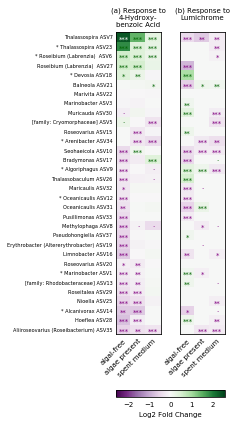

In [15]:
# PLOT THE HEATMAP FIGURE 

# setup
fig = plt.figure(figsize=(3.35,6))
gs = GridSpec(2,2, height_ratios=[40,1])
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0:2])

# 4-HYDROXYBENZOIC ACID DIFFERENTIAL ABUNDANCE HEATMAP

# plot the heatmap
plt.sca(ax1)
mesh_4hba = np.vstack((mydata_4hba['LFC.C'], 
                  mydata_4hba['LFC.P'],
                  mydata_4hba['LFC.PS']))
plt.pcolormesh(mesh_4hba.transpose(), vmin=-2.6,vmax=2.6,cmap='PRGn')

# add statistical significance
for y in range(mydata_4hba.shape[0]):
    
    # significant differences with 4-hba for no alga condition
    if abs(mydata_4hba['LFC.C'][y]) > 2:
        color='white'
    elif mydata_4hba['LFC.C'][y] > 0:
        color = 'darkgreen'
    else:
        color = 'purple'
    if mydata_4hba['C'][y]:
        txt = '*'
        if mydata_4hba['q_val.C'][y] < 0.01:
            txt = '**'
        if mydata_4hba['q_val.C'][y] < 0.001:
            txt = '***'
        plt.text(0.5,y+0.3,txt, ha='center', va='center', fontsize=7, color=color)
    elif mydata_4hba['q_val.C'][y] < 0.1:
        txt = '.'
        plt.text(0.5,y+0.6,txt, ha='center', va='center', fontsize=7, color=color)
    
    # significant differences with 4-hba for alga present condition
    if abs(mydata_4hba['LFC.P'][y]) > 2:
        color='white'
    elif mydata_4hba['LFC.P'][y] > 0:
        color = 'darkgreen'
    else:
        color = 'purple'
    if mydata_4hba['P'][y]:
        txt = '*'
        if mydata_4hba['q_val.P'][y] < 0.01:
            txt = '**'
        if mydata_4hba['q_val.P'][y] < 0.001:
            txt = '***'
        plt.text(1.5,y+0.3,txt, ha='center', va='center', fontsize=7, color=color)
    elif mydata_4hba['q_val.P'][y] < 0.1:
        txt = '.'
        plt.text(1.5,y+0.6,txt, ha='center', va='center', fontsize=7, color=color)
        
        
    # significant differences with 4-hba for algal spent medium condition    
    if abs(mydata_4hba['LFC.PS'][y]) > 2:
        color='white'
    elif mydata_4hba['LFC.PS'][y] > 0:
        color = 'darkgreen'
    else:
        color = 'purple'
    if mydata_4hba['PS'][y]:
        txt = '*'
        if mydata_4hba['q_val.PS'][y] < 0.01:
            txt = '**'
        if mydata_4hba['q_val.PS'][y] < 0.001:
            txt = '***'
        plt.text(2.5,y+0.3,txt, ha='center', va='center', fontsize=7, color=color)
    elif mydata_4hba['q_val.PS'][y] < 0.1:
        txt = '.'
        plt.text(2.5,y+0.6,txt, ha='center', va='center', fontsize=7, color=color)

# add labels
labels = [mydata_4hba['Label'][str(rn)] + ' ' + rn for rn in  mydata_4hba.index]
labels_starred = ['* '+x if x.split()[-1] in ['ASV12','ASV6','ASV23','ASV34',
                                              'ASV9','ASV18','ASV14','ASV1'] else x for x in labels]      
plt.yticks(np.arange(len(labels_starred))+0.5, labels_starred, fontsize=5)
plt.xticks([0.75,1.75,2.75],['algal-free','algae present','spent medium'], rotation=45, fontsize=7, ha='right')
ax1.tick_params(length=0)
plt.title('(a) Response to\n4-Hydroxy-\nbenzoic Acid', fontsize=7)

# LUMICHROME ACID DIFFERENTIAL ABUNDANCE HEATMAP

# plot the heatmap
plt.sca(ax2)
mesh_lum = np.vstack((mydata_lum['LFC.C']* mydata_lum['C'], 
                  mydata_lum['LFC.P']* mydata_lum['P'],
                  mydata_lum['LFC.PS']* mydata_lum['PS']))
plt.pcolormesh(mesh_lum.transpose(), vmin=-2.6,vmax=2.6,cmap='PRGn')

# add statistical significance
for y in range(mydata_lum.shape[0]):
    
    # significant differences with lum for no alga condition 
    if abs(mydata_lum['LFC.C'][y]) > 2:
        color='white'
    elif mydata_lum['LFC.C'][y] > 0:
        color = 'darkgreen'
    else:
        color = 'purple'
    if mydata_lum['C'][y]:
        txt = '*'
        if mydata_lum['q_val.C'][y] < 0.01:
            txt = '**'
        if mydata_lum['q_val.C'][y] < 0.001:
            txt = '***'
        plt.text(0.5,y+0.3,txt, ha='center', va='center', fontsize=7, color=color)
    elif mydata_lum['q_val.C'][y] < 0.1:
        txt = '.'
        plt.text(0.5,y+0.6,txt, ha='center', va='center', fontsize=7, color=color)
    
    # significant differences with lum for alga present condition 
    if abs(mydata_lum['LFC.P'][y]) > 2:
        color='white'
    elif mydata_lum['LFC.P'][y] > 0:
        color = 'darkgreen'
    else:
        color = 'purple'
    if mydata_lum['P'][y]:
        txt = '*'
        if mydata_lum['q_val.P'][y] < 0.01:
            txt = '**'
        if mydata_lum['q_val.P'][y] < 0.001:
            txt = '***'
        plt.text(1.5,y+0.3,txt, ha='center', va='center', fontsize=7, color=color)
    elif mydata_lum['q_val.P'][y] < 0.1:
        txt = '.'
        plt.text(1.5,y+0.6,txt, ha='center', va='center', fontsize=7, color=color)
    
    # significant differences with lum for algal spent medium condition 
    if abs(mydata_lum['LFC.PS'][y]) > 2:
        color='white'
    elif mydata_lum['LFC.PS'][y] > 0:
        color = 'darkgreen'
    else:
        color = 'purple'
    if mydata_lum['PS'][y]:
        txt = '*'
        if mydata_lum['q_val.PS'][y] < 0.01:
            txt = '**'
        if mydata_lum['q_val.PS'][y] < 0.001:
            txt = '***'
        plt.text(2.5,y+0.3,txt, ha='center', va='center', fontsize=7, color=color)
    elif mydata_lum['q_val.PS'][y] < 0.1:
        txt = '.'
        plt.text(2.5,y+0.6,txt, ha='center', va='center', fontsize=7, color=color)
        
# add labels        
plt.yticks([])
plt.xticks([0.75,1.75,2.75],['algal-free','algae present','spent medium'], rotation=45, fontsize=7, ha='right')
ax2.tick_params(length=0)
plt.title('(b) Response to\nLumichrome\n', fontsize=7)

# add colorbar
cbar = plt.colorbar(orientation='horizontal', fraction=0.1, aspect=20, pad=0.15, ticks=[-2,-1,0,1,2], cax=ax3)
cbar.ax.tick_params(labelsize=7, length=0)
cbar.set_label('Log2 Fold Change', fontsize=7)

# cleanup
plt.tight_layout()
plt.savefig('Figure6.png', dpi=300)
plt.show()

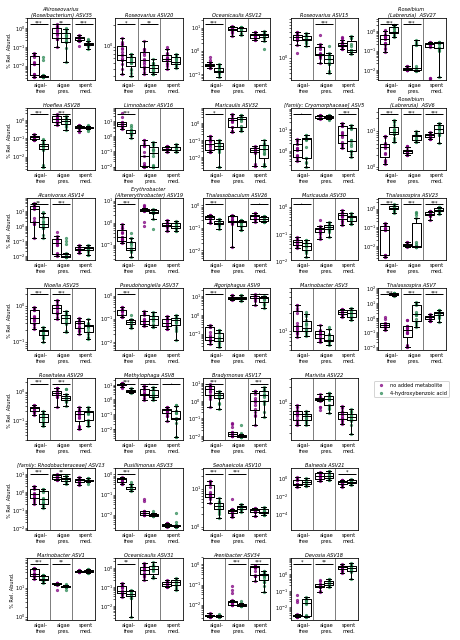

In [40]:
# INDIVIDUAL ASV RESPONSES TO 4-HYDROXYBENZOIC ACID

# function to plot response of one ASV to 4-hba
def oneASVresponse_4hba(name):
    
    # plot ASV abnudances without metabolite addition
    plt.boxplot(100*np.vstack((data.loc[(data['metabolite'] == 'none') & 
                                    (data['algae'] == 'none')][name],
                           data.loc[(data['metabolite'] == 'none') & 
                                    (data['algae'] == 'Phaeodactylum')][name],
                           data.loc[(data['metabolite'] == 'none') & 
                                    (data['algae'] == 'Phaeodactylum spent medium')][name])).transpose(),
               positions=[-0.2,0.8,1.8],widths=0.4,medianprops={'color':'k'}, showfliers=False)
    plt.scatter(np.hstack((np.ones(15)*-0.2,np.ones(15)*0.8,np.ones(15)*1.8)),
                100*data.loc[(data['metabolite'] == 'none')][name],
                color='purple', s=5, alpha=0.7, label='no added metabolite')
    
    # plot ASV abnudances with 4-hba addition
    plt.boxplot(100*np.vstack((data.loc[(data['metabolite'] == '4hydroxybenzoic_acid') & 
                                    (data['algae'] == 'none')][name],
                           data.loc[(data['metabolite'] == '4hydroxybenzoic_acid') & 
                                    (data['algae'] == 'Phaeodactylum')][name],
                           data.loc[(data['metabolite'] == '4hydroxybenzoic_acid') & 
                                    (data['algae'] == 'Phaeodactylum spent medium')][name])).transpose(),
               positions=[0.2,1.2,2.2],widths=0.4,medianprops={'color':'k'}, showfliers=False)
    plt.scatter(np.hstack((np.ones(15)*0.2,np.ones(15)*1.2,np.ones(15)*2.2)),
                100*data.loc[(data['metabolite'] == '4hydroxybenzoic_acid')][name],
                color='seagreen', s=5, alpha=0.7, label='4-hydroxybenzoic acid')
    
    # add statistical significance        
    ax = plt.gca()
    trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
    if mydata_4hba['q_val.C'][name] < 0.1:
        plt.hlines(0.9,-0.4,0.4,lw=1,color='k', transform=trans)
        txt = '.'
        if mydata_4hba['q_val.C'][name] < 0.05: txt = '*'
        if mydata_4hba['q_val.C'][name] < 0.01: txt = '**'
        if mydata_4hba['q_val.C'][name] < 0.001: txt = '***'
        plt.text(0,0.9,txt, transform=trans, ha='center', va='bottom',fontsize=5)
    if mydata_4hba['q_val.P'][name] < 0.1:
        plt.hlines(0.9,1-0.4,1+0.4,lw=1,color='k', transform=trans)
        txt = '.' 
        if mydata_4hba['q_val.P'][name] < 0.05: txt = '*'
        if mydata_4hba['q_val.P'][name] < 0.01: txt = '**'
        if mydata_4hba['q_val.P'][name] < 0.001: txt = '***'
        plt.text(1,0.9,txt, transform=trans, ha='center', va='bottom',fontsize=5)
    if mydata_4hba['q_val.PS'][name] < 0.1:
        plt.hlines(0.9,2-0.4,2+0.4,lw=1,color='k', transform=trans)
        txt = '.' 
        if mydata_4hba['q_val.PS'][name] < 0.05: txt = '*'
        if mydata_4hba['q_val.PS'][name] < 0.01: txt = '**'
        if mydata_4hba['q_val.PS'][name] < 0.001: txt = '***'
        plt.text(2,0.9,txt, transform=trans, ha='center', va='bottom',fontsize=5)
        
    # cleanup    
    ylim = plt.ylim()    
    plt.vlines([0.5,1.5],0,2*ylim[1], lw=1, color='grey')
    plt.xlim(-0.5,2.5)
    plt.yscale('log')
    plt.ylim(ymax = 2*ylim[1])
    plt.yticks(fontsize=5)
    plt.ylabel('% Rel. Abund.', fontsize=5, labelpad=0)
    plt.xticks([0.1,1.1,2.1],['algal-\nfree','algae\npres.','spent\nmed.'], 
                   fontsize=5, rotation=0, ha='center')

    return()

# create a grid of plots for each ASV
fig, ax = plt.subplots(7,5, figsize=(6.5,9))
for y in range(7):
    for x in range(5):
        plt.sca(ax[y,x])
        ax[y,x].tick_params(length=0, pad=2)
        if 7*x+y < 32:
            oneASVresponse_4hba(mydata_4hba.index[7*x+y])
            if 7*x+y == 13:
                plt.ylim(ymax=3)
            title = labels[7*x+y]
            if "(" in title:
                idx = title.index('(')
                title = title[:idx] + '\n' + title[idx:]
            plt.title(title, fontsize=5, pad=2, style='italic')
            plt.gca().tick_params(labelsize=5)
        if x !=0:
            plt.ylabel('')
            
# add a legend 
plt.sca(ax[4,4])
oneASVresponse_4hba('ASV22')
plt.xlim(10,20)
plt.axis('off')
plt.legend(fontsize=5, loc='upper center')

# clear unused axes
ax[4,4].axis('off')
ax[5,4].axis('off')
ax[6,4].axis('off')

# cleanup
plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.45)
plt.savefig('FigureS11.png', dpi=200)
plt.show()

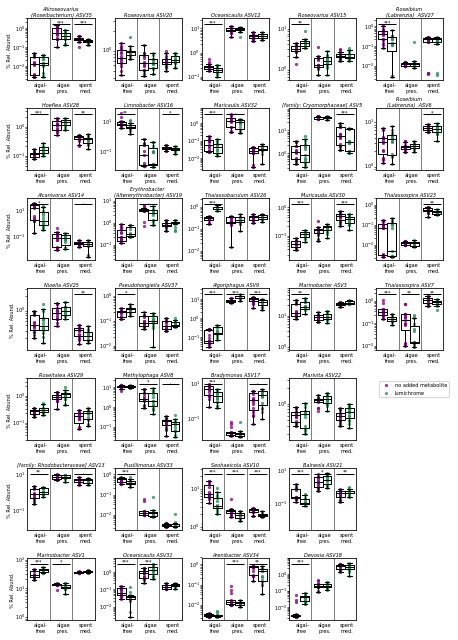

In [39]:
# INDIVIDUAL ASV RESPONSES TO LUMICHROME

# function to plot response of one ASV to lumichrome
def oneASVresponse_lum(name):
    
    # plot ASV abnudances without metabolite addition
    plt.boxplot(100*np.vstack((data.loc[(data['metabolite'] == 'none') & 
                                    (data['algae'] == 'none')][name],
                           data.loc[(data['metabolite'] == 'none') & 
                                    (data['algae'] == 'Phaeodactylum')][name],
                           data.loc[(data['metabolite'] == 'none') & 
                                    (data['algae'] == 'Phaeodactylum spent medium')][name])).transpose(),
               positions=[-0.2,0.8,1.8],widths=0.4,medianprops={'color':'k'}, showfliers=False)
    plt.scatter(np.hstack((np.ones(15)*-0.2,np.ones(15)*0.8,np.ones(15)*1.8)),
                100*data.loc[(data['metabolite'] == 'none')][name],
                color='purple', s=5, alpha=0.7, label='no added metabolite')
    
    # plot ASV abnudances with lumichrome addition
    plt.boxplot(100*np.vstack((data.loc[(data['metabolite'] == 'lumichrome') & 
                                    (data['algae'] == 'none')][name],
                           data.loc[(data['metabolite'] == 'lumichrome') & 
                                    (data['algae'] == 'Phaeodactylum')][name],
                           data.loc[(data['metabolite'] == 'lumichrome') & 
                                    (data['algae'] == 'Phaeodactylum spent medium')][name])).transpose(),
               positions=[0.2,1.2,2.2],widths=0.4,medianprops={'color':'k'}, showfliers=False)
    plt.scatter(np.hstack((np.ones(15)*0.2,np.ones(15)*1.2,np.ones(15)*2.2)),
                100*data.loc[(data['metabolite'] == 'lumichrome')][name],
                color='seagreen', s=5, alpha=0.7, label='lumichrome')
    
    # add statistical significance
    ax = plt.gca()
    trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
    if mydata_lum['q_val.C'][name] < 0.1:
        plt.hlines(0.9,-0.4,0.4,lw=1,color='k', transform=trans)
        txt = '.' 
        if mydata_lum['q_val.C'][name] < 0.05: txt = '*'
        if mydata_lum['q_val.C'][name] < 0.01: txt = '**'
        if mydata_lum['q_val.C'][name] < 0.001: txt = '***'
        plt.text(0,0.9,txt, transform=trans, ha='center', va='bottom',fontsize=5)
    if mydata_lum['q_val.P'][name] < 0.1:
        plt.hlines(0.9,1-0.4,1+0.4,lw=1,color='k', transform=trans)
        txt = '.' 
        if mydata_lum['q_val.P'][name] < 0.05: txt = '*'
        if mydata_lum['q_val.P'][name] < 0.01: txt = '**'
        if mydata_lum['q_val.P'][name] < 0.001: txt = '***'
        plt.text(1,0.9,txt, transform=trans, ha='center', va='bottom',fontsize=5)
    if mydata_lum['q_val.PS'][name] < 0.1:
        plt.hlines(0.9,2-0.4,2+0.4,lw=1,color='k', transform=trans)
        txt = '.' 
        if mydata_lum['q_val.PS'][name] < 0.05: txt = '*'
        if mydata_lum['q_val.PS'][name] < 0.01: txt = '**'
        if mydata_lum['q_val.PS'][name] < 0.001: txt = '***'
        plt.text(2,0.9,txt, transform=trans, ha='center', va='bottom',fontsize=5)
    
    # cleanup 
    ylim = plt.ylim()    
    plt.vlines([0.5,1.5],0,2*ylim[1], lw=1, color='grey')
    plt.xlim(-0.5,2.5)
    plt.yscale('log')
    plt.ylim(ymax = 2*ylim[1])
    plt.yticks(fontsize=5)
    plt.ylabel('% Rel. Abund.', fontsize=5, labelpad=0)
    plt.xticks([0.1,1.1,2.1],['algal-\nfree','algae\npres.','spent\nmed.'], 
                   fontsize=5, rotation=0, ha='center')

# create a grid of plots for each ASV
fig, ax = plt.subplots(7,5, figsize=(6.5,9))
for y in range(7):
    for x in range(5):
        plt.sca(ax[y,x])
        ax[y,x].tick_params(length=0, pad=2)
        if 7*x+y < 32:
            oneASVresponse_lum(mydata_lum.index[7*x+y])
            title = labels[7*x+y]
            if "(" in title:
                idx = title.index('(')
                title = title[:idx] + '\n' + title[idx:]
            plt.title(title, fontsize=5, pad=2, style='italic')
        if x !=0:
            plt.ylabel('')
            
# add a legend
plt.sca(ax[4,4])
oneASVresponse_lum('ASV22')
plt.xlim(10,20)
plt.axis('off')
plt.legend(fontsize=5, loc='upper left')

# clear unused axes
ax[4,4].axis('off')
ax[5,4].axis('off')
ax[6,4].axis('off')

# cleaunup
plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.45)
plt.savefig('FigureS12.png', dpi=200)
plt.show()